In [242]:
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder


In [243]:
df = pd.read_csv('dataset.csv', encoding='latin-1')

In [244]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [245]:
df.shape

(5572, 5)

# Data Cleaning

In [246]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [247]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [248]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [249]:
enc = LabelEncoder()
df['target'] = enc.fit_transform(df['target'])

In [250]:
df.isna().sum()

target    0
text      0
dtype: int64

In [251]:
df.duplicated().sum()

np.int64(403)

In [252]:
# dropped duplicated values
df = df.drop_duplicates(keep='first')

In [253]:
df.shape

(5169, 2)

# EDA

In [254]:
per = round(df['target'].value_counts() / df.shape[0] * 100,2)
per

target
0    87.37
1    12.63
Name: count, dtype: float64

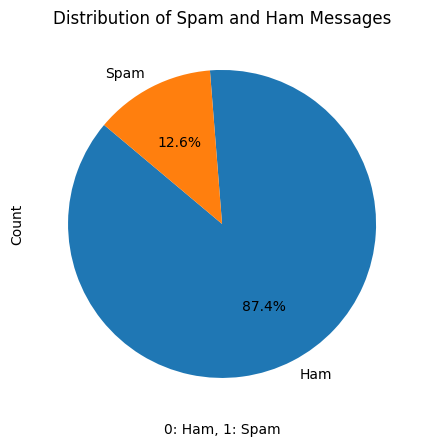

In [255]:
plt.figure(figsize=(8,5))
plt.pie(df['target'].value_counts(), labels=['Ham', 'Spam'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('0: Ham, 1: Spam')
plt.ylabel('Count')
plt.show()

data imbalance

In [256]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/karangautam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/karangautam/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [257]:
df['num_characters'] = df['text'].apply(len)

In [258]:
# number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [259]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [260]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [261]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [262]:
# ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [263]:
# spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

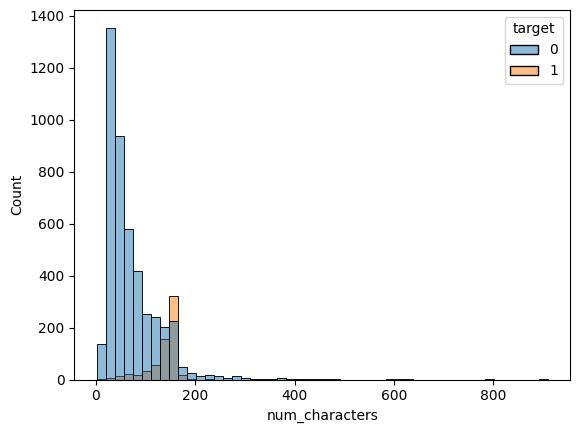

In [264]:
sns.histplot(data=df, x='num_characters', hue='target', bins=50)

<Axes: xlabel='num_words', ylabel='Count'>

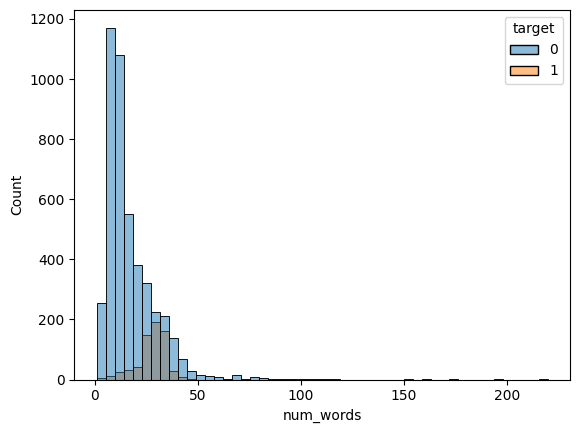

In [265]:
sns.histplot(data=df, x='num_words', hue='target', bins=50)

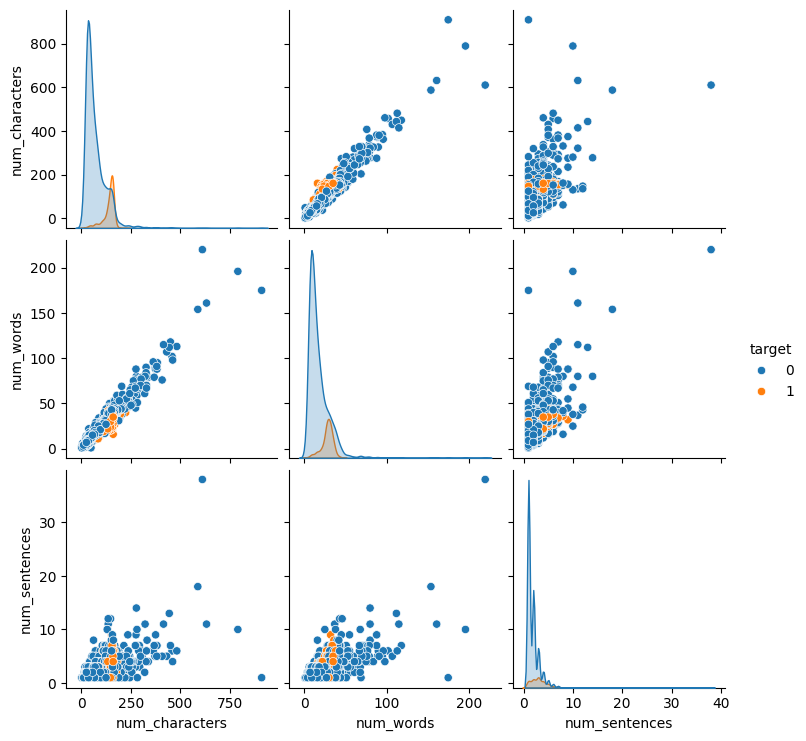

In [266]:
sns.pairplot(df, hue='target')

<Axes: >

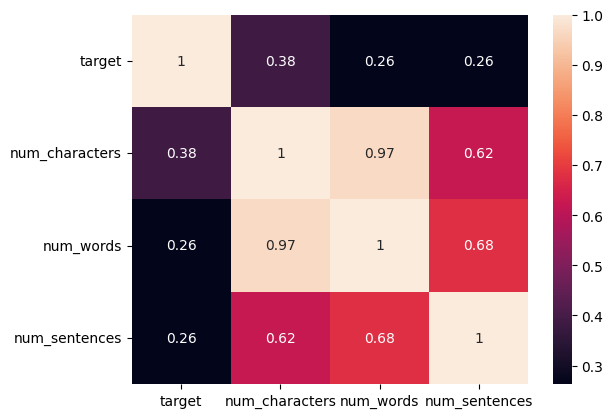

In [267]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data Preprocessing

In [268]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/karangautam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [269]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    ps = PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y) 

In [270]:
transform_text('Hello friends,i love watching ML vedios on YT!')

'hello friend love watch ml vedio yt'

In [271]:
# df['text'] = df['text'].str.lower()
df['transformed_text'] = df['text'].apply(transform_text)

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

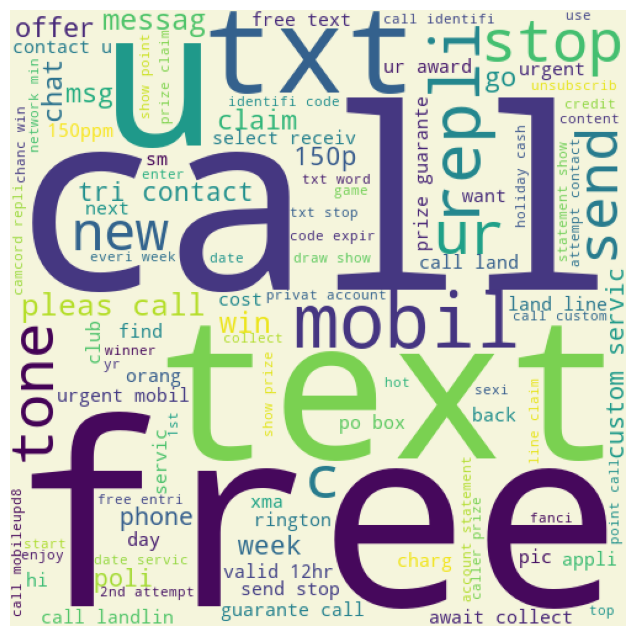

In [272]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='beige')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.axis('off')

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

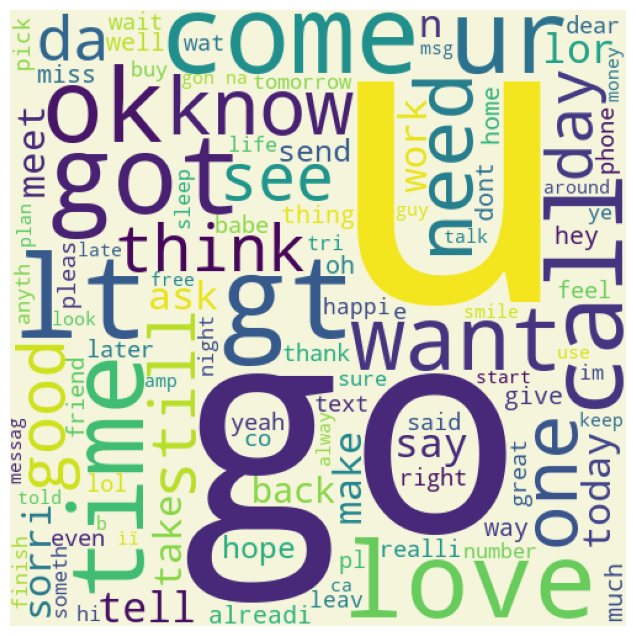

In [273]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)
plt.axis('off')

In [274]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

<Axes: ylabel='Word'>

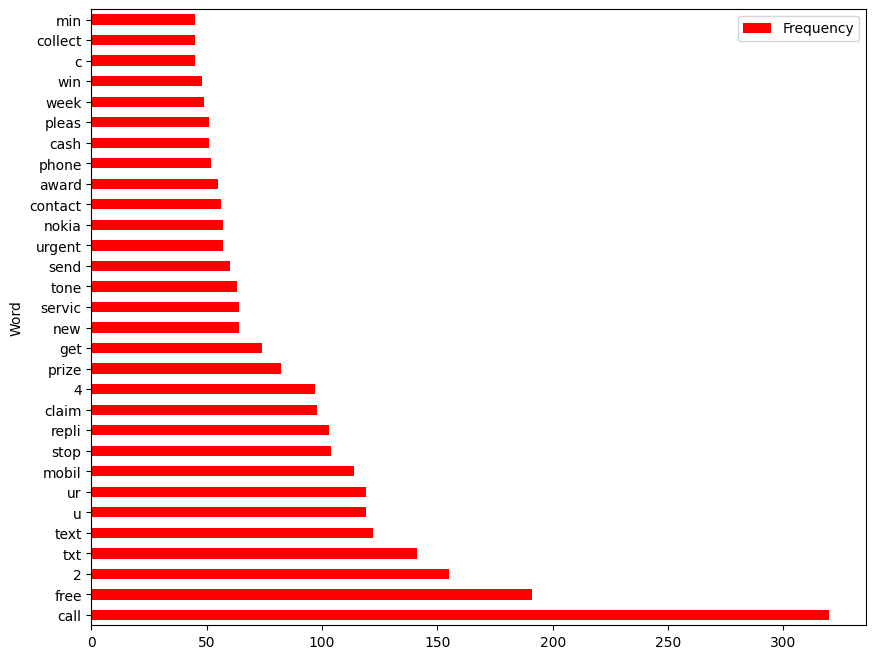

In [275]:
from collections import Counter

counter = Counter(spam_corpus)
most_common_spam = counter.most_common(30)
most_common_spam_df = pd.DataFrame(most_common_spam, columns=['Word', 'Frequency'])
most_common_spam_df.plot.barh(x='Word', y='Frequency', figsize=(10,8), color='red')

In [276]:
ham_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

<Axes: ylabel='Word'>

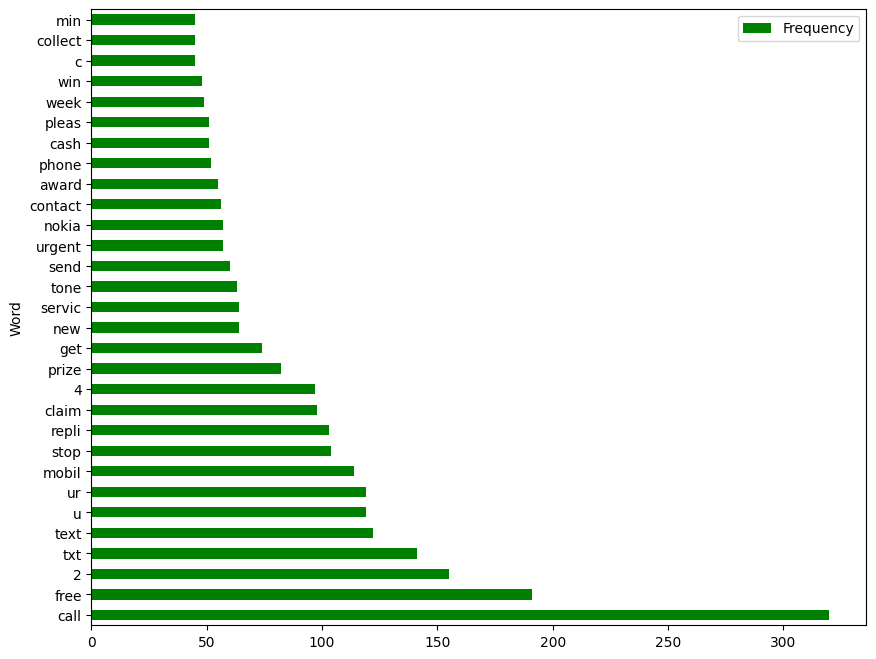

In [277]:
counter1 = Counter(ham_corpus)
most_common_ham = counter1.most_common(30)
most_common_ham_df = pd.DataFrame(most_common_ham, columns=['Word', 'Frequency'])
most_common_ham_df.plot.barh(x='Word', y='Frequency', figsize=(10,8), color='green')

# Model

In [279]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [280]:
# x = cv.fit_transform(df['transformed_text']).toarray()
x = tfid.fit_transform(df['transformed_text']).toarray()

In [175]:
x = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [176]:
x.shape

(5169, 3001)

In [281]:
from sklearn.model_selection import train_test_split

In [282]:
y = df['target'].values

In [283]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [284]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score

In [285]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [159]:
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print("Gaussian Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Gaussian Naive Bayes
Accuracy: 0.8694390715667312
Precision: 0.5068493150684932
Confusion Matrix:
 [[788 108]
 [ 27 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.80      0.62       138

    accuracy                           0.87      1034
   macro avg       0.74      0.84      0.77      1034
weighted avg       0.91      0.87      0.88      1034



In [286]:
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)
print("Multinomial Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Multinomial Naive Bayes
Accuracy: 0.9709864603481625
Precision: 1.0
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [161]:
bnb.fit(x_train, y_train)
y_pred = bnb.predict(x_test)
print("Bernoulli Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Bernoulli Naive Bayes
Accuracy: 0.9835589941972921
Precision: 0.991869918699187
Confusion Matrix:
 [[895   1]
 [ 16 122]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.99      0.88      0.93       138

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [162]:
# tfidf is better than countvectorizer and multinomialNB is giving best accuracy

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [164]:
svc = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [165]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbc,
    'xgb':xgb
}

In [167]:
def training_models(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [168]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = training_models(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.82
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703


/Users/karangautam/Desktop/ppro/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/karangautam/Desktop/ppro/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8488372093023255
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [ ]:
performance = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

In [234]:
performance.sort_values(by='Precision', ascending=False)

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
6,AdaBoost,0.924565,0.848837


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'KN'),
  Text(2, 0, 'NB'),
  Text(3, 0, 'DT'),
  Text(4, 0, 'LR'),
  Text(5, 0, 'RF'),
  Text(6, 0, 'AdaBoost'),
  Text(7, 0, 'BgC'),
  Text(8, 0, 'ETC'),
  Text(9, 0, 'GBDT'),
  Text(10, 0, 'xgb')])

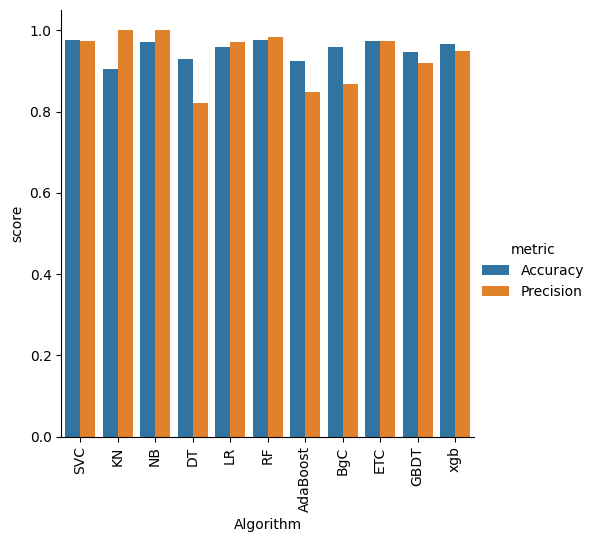

In [236]:
performance_melted = performance.melt(
	id_vars='Algorithm',
	value_vars=['Accuracy', 'Precision'],
	var_name='metric',
	value_name='score'
)

sns.catplot(x='Algorithm', y='score', hue='metric', data=performance_melted, kind='bar')
plt.xticks(rotation=90)

In [237]:
from sklearn.ensemble import VotingClassifier
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [238]:
voting = VotingClassifier(estimators=[('SVC', svc), ('MNB', mnb), ('ETC', etc)], voting='soft')

In [239]:
voting.fit_transform(x_train, y_train)

array([[9.99185953e-01, 8.14046687e-04, 9.93336452e-01, 6.66354811e-03,
        1.00000000e+00, 0.00000000e+00],
       [9.93557667e-01, 6.44233256e-03, 9.88058670e-01, 1.19413304e-02,
        1.00000000e+00, 0.00000000e+00],
       [9.71518358e-01, 2.84816424e-02, 8.48957730e-01, 1.51042270e-01,
        1.00000000e+00, 0.00000000e+00],
       ...,
       [9.99537818e-01, 4.62182416e-04, 9.88554272e-01, 1.14457278e-02,
        1.00000000e+00, 0.00000000e+00],
       [9.99245990e-01, 7.54010266e-04, 9.98670838e-01, 1.32916219e-03,
        1.00000000e+00, 0.00000000e+00],
       [9.88093831e-01, 1.19061688e-02, 9.65814765e-01, 3.41852349e-02,
        1.00000000e+00, 0.00000000e+00]], shape=(4135, 6))

In [180]:
y_pred = voting.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9816247582205029
0.9917355371900827


In [181]:
estimators = [('SVC', svc), ('MNB', mnb), ('ETC', etc)]
final = RandomForestClassifier()

In [182]:
from sklearn.ensemble import StackingClassifier
stacking = StackingClassifier(estimators=estimators, final_estimator=final)
stacking.fit(x_train, y_train)

,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.The type of estimator is generally expected to be a classifier.However, one can pass a regressor for some use case (e.g. ordinalregression).","[('SVC', ...), ('MNB', ...), ...]"
,"final_estimator final_estimator: estimator, default=NoneA classifier which will be used to combine the base estimators.The default classifier is a:class:`~sklearn.linear_model.LogisticRegression`.",RandomForestClassifier()
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",None
,"stack_method stack_method: {'auto', 'predict_proba', 'decision_function', 'predict'}, default='auto'Methods called for each base estimator. It can be:* if 'auto', it will try to invoke, for each estimator, `'predict_proba'`, `'decision_function'` or `'predict'` in that order.* otherwise, one of `'predict_proba'`, `'decision_function'` or `'predict'`. If the method is not implemented by the estimator, it will raise an error.",'auto'
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",None
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degr

In [183]:
y_pred = voting.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9816247582205029
0.9917355371900827


In [287]:
import pickle
pickle.dump(tfid, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))